# Importing Libraries

In [26]:
import matplotlib.pyplot as plt
import importlib
import torch
from torchvision import transforms
import torchvision.transforms as standard_transforms
from torch.utils.data import DataLoader
from voc import VOC

import numpy as np

# Mapping Class to Color

In [27]:
'''
color map
0=background, 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle # 6=bus, 7=car, 8=cat, 9=chair, 10=cow, 11=diningtable,
12=dog, 13=horse, 14=motorbike, 15=person # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
'''

noToClass = {
    0:"background", 1:"aeroplane", 2:"bicycle", 3:"bird", 4:"boat", 5:"bottle", 6:"bus", 7:"car", 8:"cat", 9:"chair", 10:"cow", 11:"dining table",
12:"dog", 13:"horse", 14:"motorbike", 15:"person", 16:"potted plant", 17:"sheep", 18:"sofa", 19:"train", 20:"tv/monitor"
}

palette = [0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128,
           128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128,
           64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128]  #3 values- R,G,B for every class. First 3 values for class 0, next 3 for

"""
    TODO Convert palette to map class number to RGB color.

    Expected output, python dictionary with 21 integer keys, each value being a array of size 3

"""
noToColor = {}
for i in range(21):
    noToColor[i] = palette[3*i:3*i+3]



# Transformations to be done on images

In [28]:
# TODO Rewrite the following transformations to the ones your models are trained on.
mean_std = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
input_transform = standard_transforms.Compose([
        standard_transforms.ToTensor(),
        #standard_transforms.Normalize(*mean_std)
    ])
class MaskToTensor(object):
    def __call__(self, img):
        return torch.from_numpy(np.array(img, dtype=np.int32)).long()
    
target_transform = standard_transforms.ToTensor()

# Getting random test image and mask

In [29]:
batch_size = 1
DS = VOC('test', transform=input_transform, target_transform=target_transform)
DL = DataLoader(dataset=DS, batch_size= batch_size, shuffle=False)

first_batch = iter(DL)

In [30]:

img, msk = next(first_batch)

# Plotting Function

In [31]:
def makeImagesPlotReady(msk, channels = 3):
    """
    TODO 
    Similar to how you converted the images, make the mask tensor matplotlib ready

    args:
        msk or img - input mask tensor of shape [1, 3, 224, 224] or numpy of shape (3, 224, 224)
    returns:
        mask/img - mask that is ready to be plotted using matplotlib.
                    Hint: Numpy class of shape (224, 224, 3)
    """

    if msk.shape[1] == 3:
        result = msk[0].permute(1, 2, 0).numpy()
    else:
        result = torch.from_numpy(msk)
        result = result.permute(1, 2, 0).numpy()
    return result

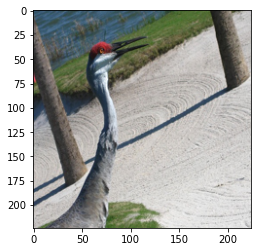

In [32]:
# Check your makeImagesPlotReady implementation by printing the img variable
plt.imshow(makeImagesPlotReady(img,3))

### Preprocessing msk

In [33]:
msk = (msk*255).int()
msk[msk==255]=0

In [34]:
def convertMaskToRGB(msk_1d):
    print("mask_1d shape",msk_1d.shape)
    mask_rgb = np.zeros((3, 224, 224), dtype=np.uint8) # Empty array to store RGB of each class
        
    for idx, color in noToColor.items(): # Converting to colors
        for j in range(3): # R,G,B
            mask_rgb[j][msk_1d[0] == idx] = color[j]
            mask_rgb[j][msk_1d[0] == idx] = color[j]
            mask_rgb[j][msk_1d[0] == idx] = color[j]

    return mask_rgb

# Plotting single mask

mask_1d shape torch.Size([1, 224, 224])


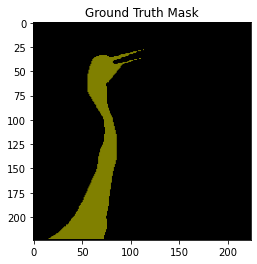

In [35]:
# Check your makeImagesPlotReady implementation by printing the msk variable

mask_rgb = convertMaskToRGB(msk[0])
plt.imshow(makeImagesPlotReady(mask_rgb,3))
plt.title("Ground Truth Mask")
plt.show()

# Running Inference on all trained models

In [36]:
"""
TODO:
The following comments are what we suggest your final 
code structure should look like for streamlined inference.
"""

# Importing all Question train files.
import train
import train_4a
import train_4b
import train_4c
import train_5a
import train_5b
import train_5c
numberOfModels = 7
models = ["train", "train_4a", "train_4b", "train_4c", "train_5a", "train_5b", "train_5c"]

#### baseline model:

epoch0, iter0, loss: 3.1817545890808105
epoch0, iter10, loss: 2.708043336868286
Finish epoch 0, time elapsed 1.7175264358520508
Loss at epoch: 0 is 2.5264570713043213
IoU at epoch: 0 is 0.017715002450681697
Pixel acc at epoch: 0 is 0.2077179253101349
epoch1, iter0, loss: 2.584320306777954
epoch1, iter10, loss: 2.4850094318389893
Finish epoch 1, time elapsed 1.5119056701660156
Loss at epoch: 1 is 2.0116536617279053
IoU at epoch: 1 is 0.04718931027582361
Pixel acc at epoch: 1 is 0.6594501733779907
epoch2, iter0, loss: 2.423746109008789
epoch2, iter10, loss: 2.203151226043701
Finish epoch 2, time elapsed 1.4724235534667969
Loss at epoch: 2 is 2.221264362335205
IoU at epoch: 2 is 0.042748778027709454
Pixel acc at epoch: 2 is 0.5645877122879028
epoch3, iter0, loss: 2.1100635528564453
epoch3, iter10, loss: 2.2530570030212402
Finish epoch 3, time elapsed 1.4896795749664307
Loss at epoch: 3 is 4.303079128265381
IoU at epoch: 3 is 0.038293359762593036
Pixel acc at epoch: 3 is 0.5804310441017151

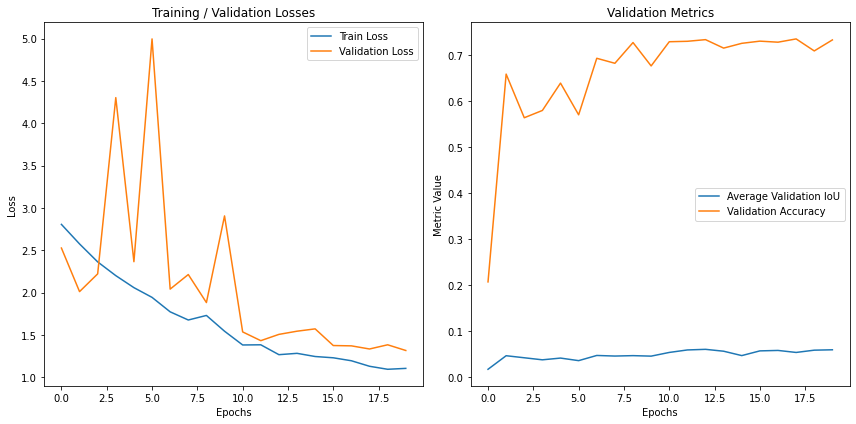

In [37]:
train.train() # train baseline model

In [38]:
print("IoU and accuracy on validation and test: ")
train.val("best val")
train.modelTest()

IoU and accuracy on validation and test: 
Loss at epoch: best val is 1.5064685344696045
IoU at epoch: best val is 0.06108462009377127
Pixel acc at epoch: best val is 0.7343986630439758
Loss at test set is 1.6161954402923584
IoU at test set is 0.0594427722331208
Pixel acc at test set  is 0.7102299332618713


### model 4a:

epoch0, iter0, loss: 3.392744302749634
epoch0, iter10, loss: 3.1755611896514893
Finish epoch 0, time elapsed 1.7655839920043945
Loss at epoch: 0 is 3.0521438121795654
IoU at epoch: 0 is 0.0005022309917797652
Pixel acc at epoch: 0 is 0.00731051666662097
epoch1, iter0, loss: 3.134263753890991
epoch1, iter10, loss: 2.9893667697906494
Finish epoch 1, time elapsed 1.5494234561920166
Loss at epoch: 1 is 2.432476282119751
IoU at epoch: 1 is 0.010767370101068752
Pixel acc at epoch: 1 is 0.12477641552686691
epoch2, iter0, loss: 3.007675886154175
epoch2, iter10, loss: 3.068964719772339
Finish epoch 2, time elapsed 1.4060089588165283
Loss at epoch: 2 is 2.8691506385803223
IoU at epoch: 2 is 0.019496874514664395
Pixel acc at epoch: 2 is 0.2087579071521759
epoch3, iter0, loss: 2.727591037750244
epoch3, iter10, loss: 2.720437526702881
Finish epoch 3, time elapsed 1.514460563659668
Loss at epoch: 3 is 2.687504529953003
IoU at epoch: 3 is 0.04474492185028063
Pixel acc at epoch: 3 is 0.5314655303955078

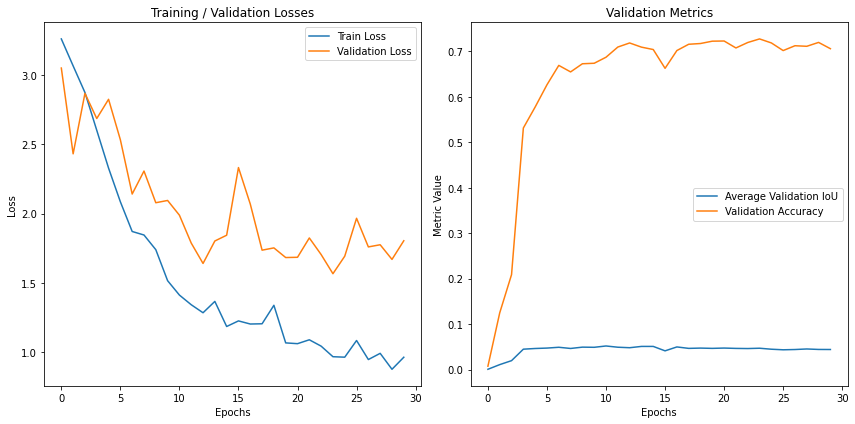

In [39]:
train_4a.train()

In [40]:
print("IoU and accuracy on validation and test: ")
train_4a.val("best val")
train_4a.modelTest()

IoU and accuracy on validation and test: 
Loss at epoch: best val is 1.989181399345398
IoU at epoch: best val is 0.051781910997332356
Pixel acc at epoch: best val is 0.6872381567955017
Loss at test set is 2.052175521850586
IoU at test set is 0.04839596420038252
Pixel acc at test set  is 0.6654482483863831


### model 4b:

epoch0, iter0, loss: 4.61238431930542
epoch0, iter10, loss: 4.4142165184021
Finish epoch 0, time elapsed 1.6574478149414062
Loss at epoch: 0 is 4.408514976501465
IoU at epoch: 0 is 0.0006607084574771139
Pixel acc at epoch: 0 is 0.004196744877845049
epoch1, iter0, loss: 4.303014755249023
epoch1, iter10, loss: 4.185784816741943
Finish epoch 1, time elapsed 1.4984750747680664
Loss at epoch: 1 is 3.979418992996216
IoU at epoch: 1 is 0.001651889273519357
Pixel acc at epoch: 1 is 0.005886155646294355
epoch2, iter0, loss: 3.768728256225586
epoch2, iter10, loss: 3.7378597259521484
Finish epoch 2, time elapsed 1.535083532333374
Loss at epoch: 2 is 3.5645198822021484
IoU at epoch: 2 is 0.006770434298082985
Pixel acc at epoch: 2 is 0.02643217146396637
epoch3, iter0, loss: 3.153839111328125
epoch3, iter10, loss: 3.1151397228240967
Finish epoch 3, time elapsed 1.6522772312164307
Loss at epoch: 3 is 3.2588322162628174
IoU at epoch: 3 is 0.011393619658226134
Pixel acc at epoch: 3 is 0.098677106201648

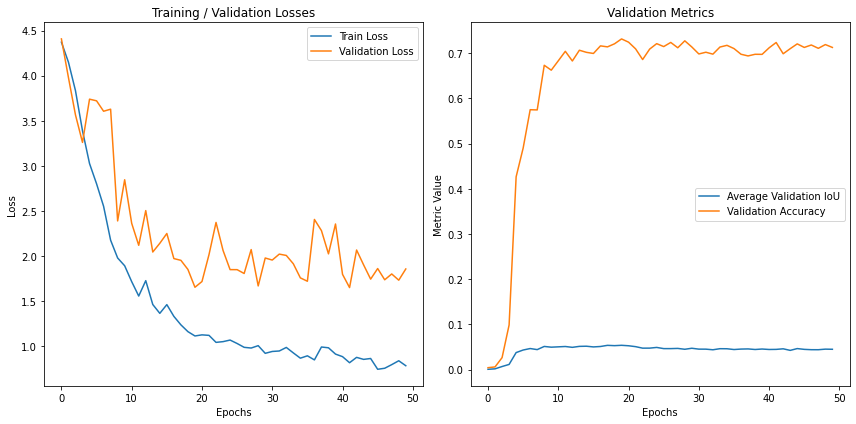

In [66]:
train_4b.train()

In [69]:
print("IoU and accuracy on validation and test: ")
train_4b.val("best val")
train_4b.modelTest()

IoU and accuracy on validation and test: 
Loss at epoch: best val is 1.853173017501831
IoU at epoch: best val is 0.04493159318474691
Pixel acc at epoch: best val is 0.7128111124038696
Loss at test set is 2.2187905311584473
IoU at test set is 0.041051807132579374
Pixel acc at test set  is 0.669949471950531


### model 4c:

epoch0, iter0, loss: 4.140102863311768
epoch0, iter10, loss: 3.6113994121551514
Finish epoch 0, time elapsed 1.6705398559570312
Loss at epoch: 0 is 3.30405592918396
IoU at epoch: 0 is 0.000263576770802661
Pixel acc at epoch: 0 is 0.004825139883905649
epoch1, iter0, loss: 3.4944703578948975
epoch1, iter10, loss: 3.411207675933838
Finish epoch 1, time elapsed 1.5646729469299316
Loss at epoch: 1 is 3.309896945953369
IoU at epoch: 1 is 0.0046048884938677944
Pixel acc at epoch: 1 is 0.025877822190523148
epoch2, iter0, loss: 3.3405089378356934
epoch2, iter10, loss: 3.1508102416992188
Finish epoch 2, time elapsed 1.4509401321411133
Loss at epoch: 2 is 3.4260897636413574
IoU at epoch: 2 is 0.006366475581774489
Pixel acc at epoch: 2 is 0.03170689195394516
epoch3, iter0, loss: 3.2066898345947266
epoch3, iter10, loss: 2.901780843734741
Finish epoch 3, time elapsed 1.5238325595855713
Loss at epoch: 3 is 3.2983572483062744
IoU at epoch: 3 is 0.006804803815105563
Pixel acc at epoch: 3 is 0.038901120

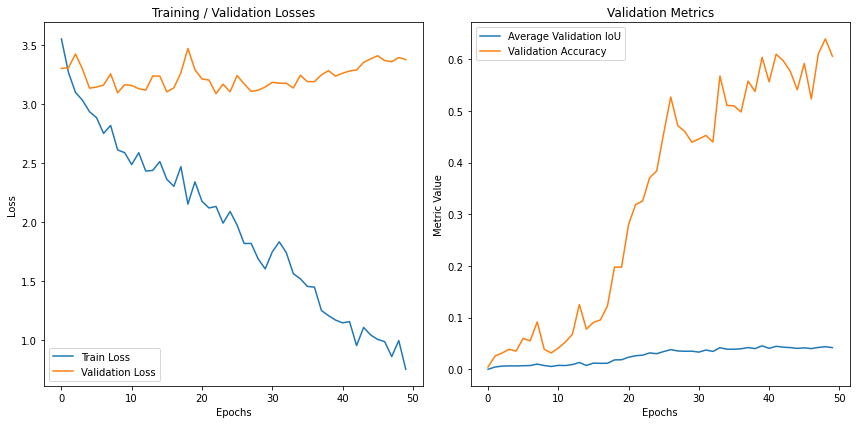

In [56]:
train_4c.train()

In [59]:
print("IoU and accuracy on validation and test: ")
train_4c.val("best val")
train_4c.modelTest()

IoU and accuracy on validation and test: 
Loss at epoch: best val is 3.379370927810669
IoU at epoch: best val is 0.042117213193546825
Pixel acc at epoch: best val is 0.6054630875587463
Loss at test set is 3.432249069213867
IoU at test set is 0.04241773301354872
Pixel acc at test set  is 0.5922966003417969


### model 5a:

epoch0, iter0, loss: 4.370635509490967
epoch0, iter10, loss: 3.166050910949707
Finish epoch 0, time elapsed 2.6068999767303467
Loss at epoch: 0 is 4.59735631942749
IoU at epoch: 0 is 0.00045884809624782626
Pixel acc at epoch: 0 is 0.0067418040707707405
epoch1, iter0, loss: 3.6210732460021973
epoch1, iter10, loss: 3.311253786087036
Finish epoch 1, time elapsed 2.246471643447876
Loss at epoch: 1 is 4.180896282196045
IoU at epoch: 1 is 0.002270570269382545
Pixel acc at epoch: 1 is 0.014889196492731571
epoch2, iter0, loss: 3.509857177734375
epoch2, iter10, loss: 3.4580647945404053
Finish epoch 2, time elapsed 2.2339956760406494
Loss at epoch: 2 is 3.8526928424835205
IoU at epoch: 2 is 0.009096672606969374
Pixel acc at epoch: 2 is 0.026723219081759453
epoch3, iter0, loss: 3.1402721405029297
epoch3, iter10, loss: 3.442610025405884
Finish epoch 3, time elapsed 2.255288600921631
Loss at epoch: 3 is 3.45029878616333
IoU at epoch: 3 is 0.007832793007629736
Pixel acc at epoch: 3 is 0.036375086754

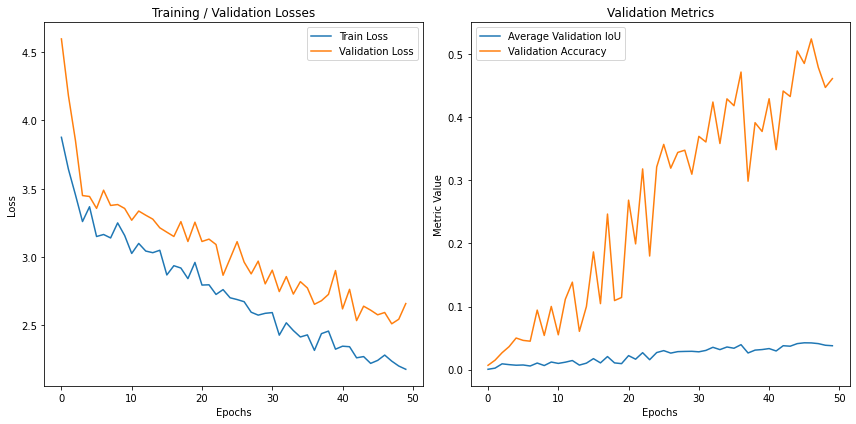

In [106]:
train_5a.train()

In [115]:
print("IoU and accuracy on validation and test: ")
train_5a.val("best val")
train_5a.modelTest()

IoU and accuracy on validation and test: 
Loss at epoch: best val is 2.5771031379699707
IoU at epoch: best val is 0.04245534308553987
Pixel acc at epoch: best val is 0.48558488488197327
Loss at test set is 2.5647032260894775
IoU at test set is 0.04275450896529618
Pixel acc at test set  is 0.46131631731987


### model 5b

In [158]:
importlib.reload(train_5b)

<module 'train_5b' from 'c:\\Users\\gl121\\Desktop\\cse151b\\pa2\\cse151b251b-wi24-pa2-pa2_lian\\train_5b.py'>

epoch0, iter0, loss: 3.280681610107422
epoch0, iter10, loss: 2.7492361068725586
Finish epoch 0, time elapsed 1.9609801769256592
Loss at epoch: 0 is 2.9821646213531494
IoU at epoch: 0 is 0.014020010772403533
Pixel acc at epoch: 0 is 0.06339117884635925
epoch1, iter0, loss: 2.704376697540283
epoch1, iter10, loss: 2.5783164501190186
Finish epoch 1, time elapsed 1.8952820301055908
Loss at epoch: 1 is 2.854607343673706
IoU at epoch: 1 is 0.02783208782429917
Pixel acc at epoch: 1 is 0.3158218562602997
epoch2, iter0, loss: 2.4709107875823975
epoch2, iter10, loss: 2.2333853244781494
Finish epoch 2, time elapsed 1.7480969429016113
Loss at epoch: 2 is 2.8999183177948
IoU at epoch: 2 is 0.03475212380842605
Pixel acc at epoch: 2 is 0.46009254455566406
epoch3, iter0, loss: 2.1581478118896484
epoch3, iter10, loss: 2.0531225204467773
Finish epoch 3, time elapsed 1.6760172843933105
Loss at epoch: 3 is 2.782090902328491
IoU at epoch: 3 is 0.028939224724555006
Pixel acc at epoch: 3 is 0.3467011749744415

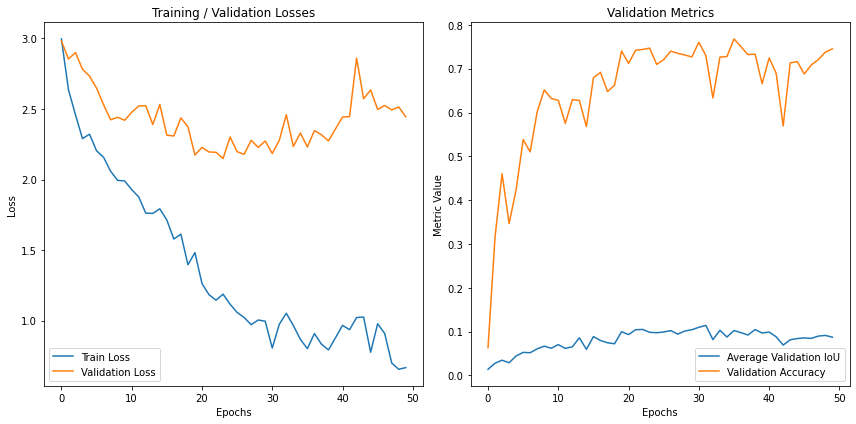

In [159]:
train_5b.train()

In [160]:
print("IoU and accuracy on validation and test: ")
train_5b.val("best val")
train_5b.modelTest()

IoU and accuracy on validation and test: 
Loss at epoch: best val is 2.2774746417999268
IoU at epoch: best val is 0.11415980204281681
Pixel acc at epoch: best val is 0.7298838496208191
Loss at test set is 2.4259145259857178
IoU at test set is 0.1056377857098706
Pixel acc at test set  is 0.7062240839004517


### model 5c:

epoch0, iter0, loss: 5.242828845977783
epoch0, iter10, loss: 3.2807180881500244
Finish epoch 0, time elapsed 2.6802408695220947
Loss at epoch: 0 is 3.1088154315948486
IoU at epoch: 0 is 0.03108368898000522
Pixel acc at epoch: 0 is 0.4159509837627411
epoch1, iter0, loss: 3.2719333171844482
epoch1, iter10, loss: 2.9478914737701416
Finish epoch 1, time elapsed 2.473050117492676
Loss at epoch: 1 is 2.936126232147217
IoU at epoch: 1 is 0.02661167033553837
Pixel acc at epoch: 1 is 0.3073583245277405
epoch2, iter0, loss: 3.2503631114959717
epoch2, iter10, loss: 3.019216299057007
Finish epoch 2, time elapsed 2.4778265953063965
Loss at epoch: 2 is 2.8550198078155518
IoU at epoch: 2 is 0.008210159153048442
Pixel acc at epoch: 2 is 0.09696529805660248
epoch3, iter0, loss: 2.8813743591308594
epoch3, iter10, loss: 2.671175241470337
Finish epoch 3, time elapsed 2.3469290733337402
Loss at epoch: 3 is 2.816598415374756
IoU at epoch: 3 is 0.044432489273174
Pixel acc at epoch: 3 is 0.5494161248207092
ep

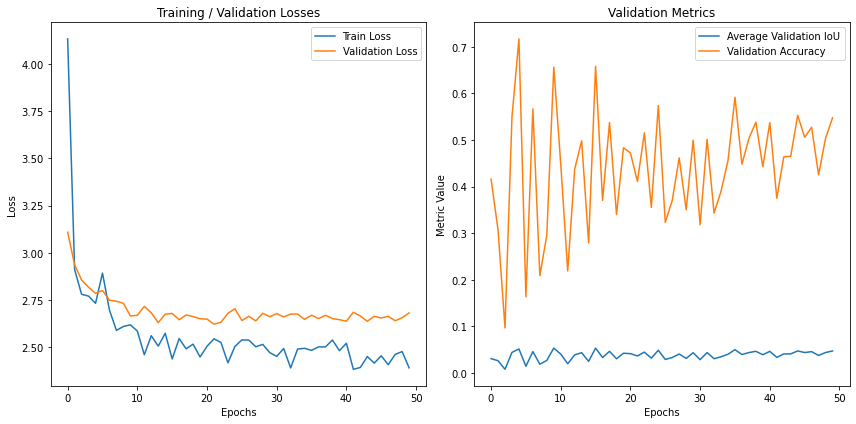

In [147]:
train_5c.train()

In [148]:
print("IoU and accuracy on validation and test: ")
train_5c.val("best val")
train_5c.modelTest()

IoU and accuracy on validation and test: 
Loss at epoch: best val is 2.6804139614105225
IoU at epoch: best val is 0.04749315609087636
Pixel acc at epoch: best val is 0.5476509928703308
Loss at test set is 2.7368600368499756
IoU at test set is 0.051393101151296514
Pixel acc at test set  is 0.5394349694252014


In [52]:
def returnToString(arr):
    string = ""
    for i in arr:
        string += noToClass[i]
        string += ", "
    return string[:-2]

In [161]:
import torch
import numpy as np
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("GROUND TRUTH CLASSES:", torch.unique(msk),"\n")

output_images = []
for model in models:
    print("Inferring Model:",model)
    output_image = eval(model).exportModel(img) # Run inference (Make sure exportModel function is imported for each train file)
    output_image = output_image.to("cpu").detach() # Remove torch components and push to cpu
    output_image = torch.argmax(output_image, dim=1) # converting softmax to OHE
    print("Model Predicted Classes:", returnToString(torch.unique(output_image).numpy()))

    mask_rgb = convertMaskToRGB(output_image)
    
    output_images.append(mask_rgb)
    

GROUND TRUTH CLASSES: tensor([0, 3], dtype=torch.int32) 

Inferring Model: train
Model Predicted Classes: background
mask_1d shape torch.Size([1, 224, 224])
Inferring Model: train_4a
Model Predicted Classes: background, bicycle, bottle
mask_1d shape torch.Size([1, 224, 224])
Inferring Model: train_4b
Model Predicted Classes: background
mask_1d shape torch.Size([1, 224, 224])
Inferring Model: train_4c
Model Predicted Classes: background, bird, dining table, person, sofa
mask_1d shape torch.Size([1, 224, 224])
Inferring Model: train_5a
Model Predicted Classes: background, cat, person, sofa
mask_1d shape torch.Size([1, 224, 224])
Inferring Model: train_5b
Model Predicted Classes: background, cat, dining table, dog, sofa
mask_1d shape torch.Size([1, 224, 224])
Inferring Model: train_5c
Model Predicted Classes: background, aeroplane, chair, person
mask_1d shape torch.Size([1, 224, 224])


# Plotting All outputs

## Plotting only predicted masks

Prediction Masks


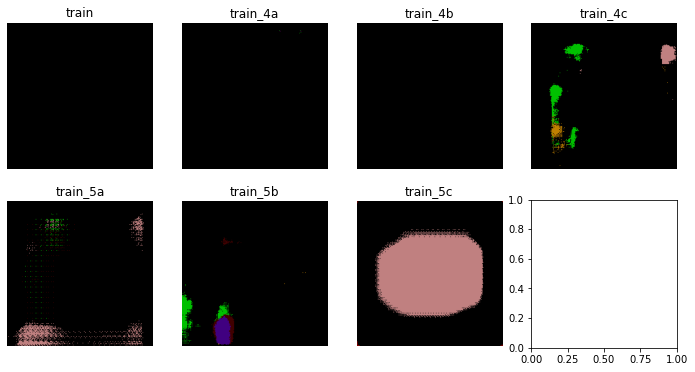

In [162]:
print("Prediction Masks")
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()
for i in range(numberOfModels):
    axs[i].imshow(makeImagesPlotReady(output_images[i],3))
    axs[i].set_title(models[i])
    axs[i].axis('off')

plt.show()

## Plotting image with the mask

Prediction Masks


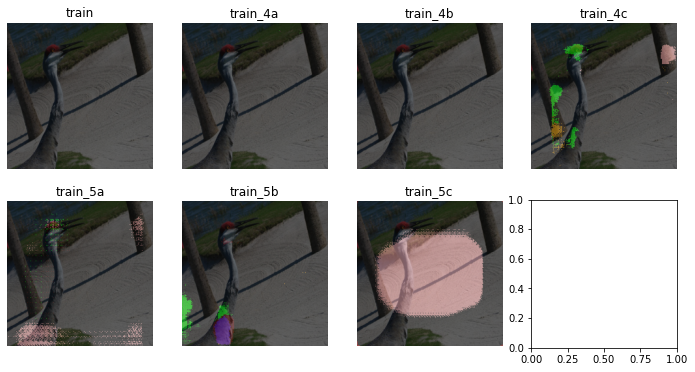

In [163]:
print("Prediction Masks")
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()
for i in range(numberOfModels):
    axs[i].imshow(makeImagesPlotReady(img,3))
    axs[i].imshow(makeImagesPlotReady(output_images[i],3), alpha = 0.6)
    axs[i].set_title(models[i])
    axs[i].axis('off')

plt.show()